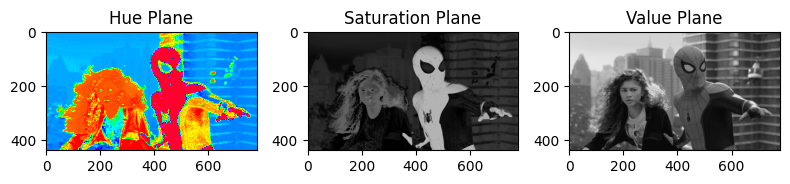

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

image_path = '/Users/kavindujayathissa/Desktop/Academics/Semester 05/EN3160 Image Processing/Assignment A01/a1images/spider.png'

pil_image = Image.open(image_path)
image_np = np.array(pil_image)
hsv_image = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

planes = [hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]]
titles = ['Hue Plane', 'Saturation Plane', 'Value Plane']

plt.figure(figsize=(8, 3))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(planes[i], cmap='gray' if i != 0 else 'hsv', vmin=0, vmax=255 if i != 0 else 179)
    plt.title(titles[i])

plt.tight_layout()
plt.show()

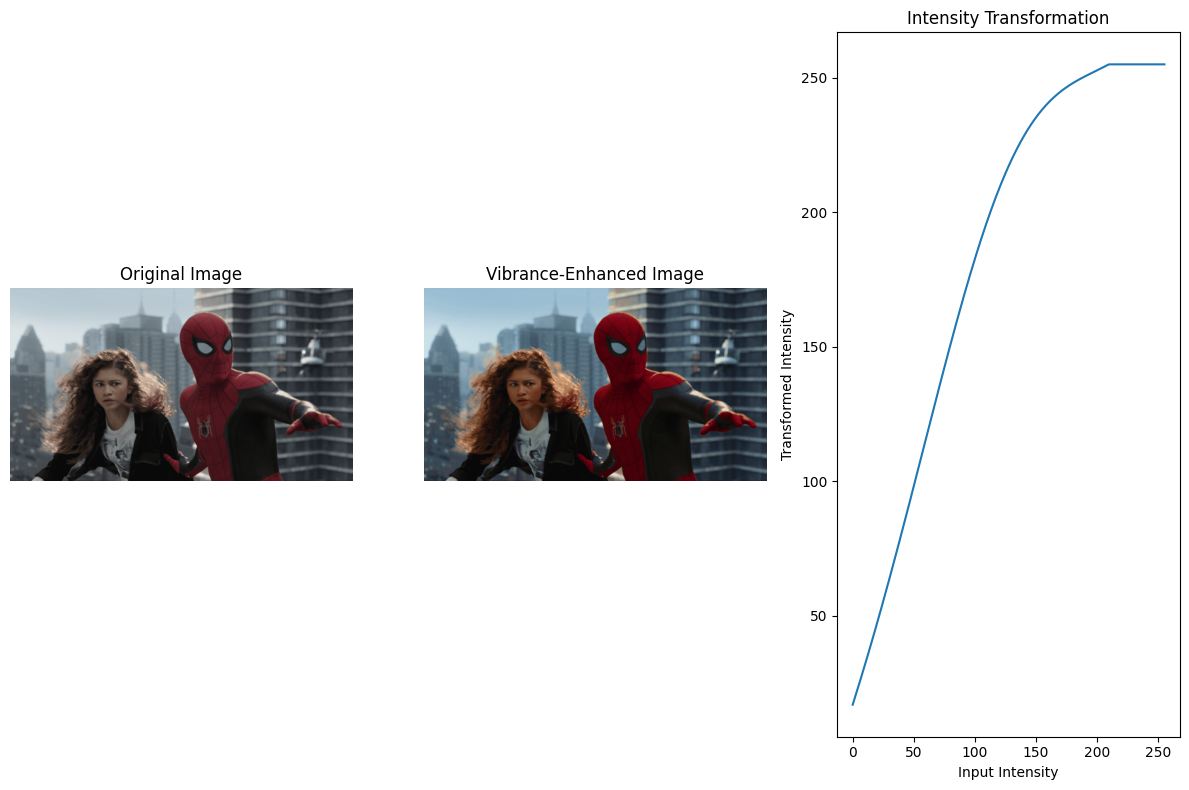

(None, None)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/Users/kavindujayathissa/Desktop/Academics/Semester 05/EN3160 Image Processing/Assignment A01/a1images/spider.png'
image = cv2.imread(image_path)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

hue_plane, saturation_plane, value_plane = hsv_image[:,:,0], hsv_image[:,:,1], hsv_image[:,:,2]

a, sigma = 0.7, 70
x = np.arange(256)
y = np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

transformed_saturation_plane = y[saturation_plane]
transformed_saturation_plane = np.clip(transformed_saturation_plane, 0, 255)

hue_plane, transformed_saturation_plane, value_plane = hue_plane.astype(np.uint8), transformed_saturation_plane.astype(np.uint8), value_plane.astype(np.uint8)
vibrance_enhanced_hsv_image = np.stack([hue_plane, transformed_saturation_plane, value_plane], axis=-1)
vibrance_enhanced_image = cv2.cvtColor(vibrance_enhanced_hsv_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(vibrance_enhanced_image, cv2.COLOR_BGR2RGB)), plt.title('Vibrance-Enhanced Image'), plt.axis('off')
plt.subplot(133), plt.plot(x, y), plt.title('Intensity Transformation'), plt.xlabel('Input Intensity'), plt.ylabel('Transformed Intensity')
plt.tight_layout(), plt.show()
